In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('D:\Clustering-of-Mall-Customers-master\Clustering-of-Mall-Customers-master\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

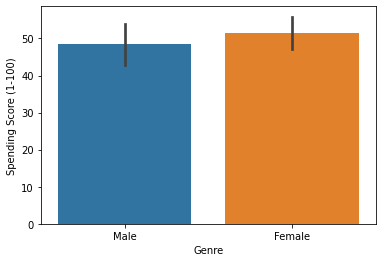

In [7]:
sns.barplot(x=df['Genre'],y=df['Spending Score (1-100)'])

c:\users\91807\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


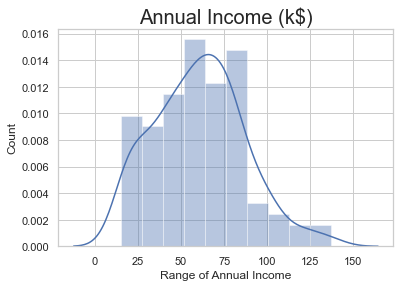

In [8]:
sns.set(style='whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)',fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

c:\users\91807\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


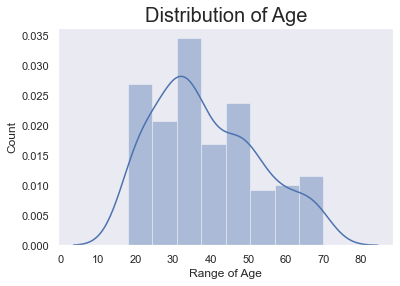

In [9]:
sns.set(style = 'dark')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In [10]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

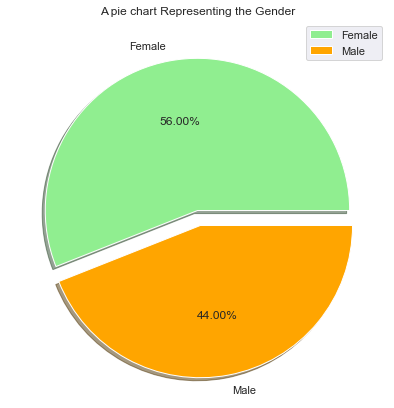

In [11]:
labels = ['Female', 'Male']
size = [112, 88]
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender')
plt.axis('off')
plt.legend()
plt.show()

<AxesSubplot:>

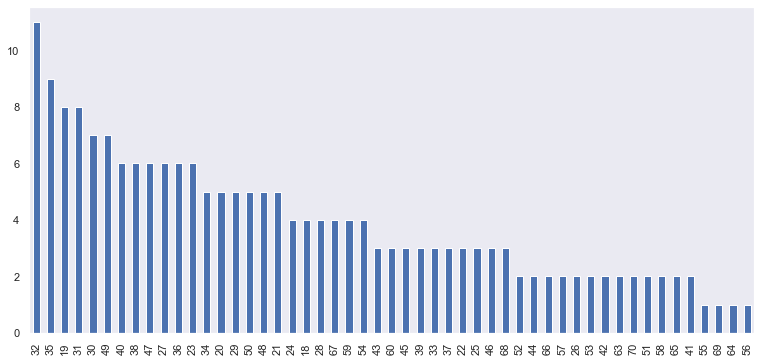

In [12]:
df['Age'].value_counts().plot.bar(figsize = (13, 6))

<AxesSubplot:>

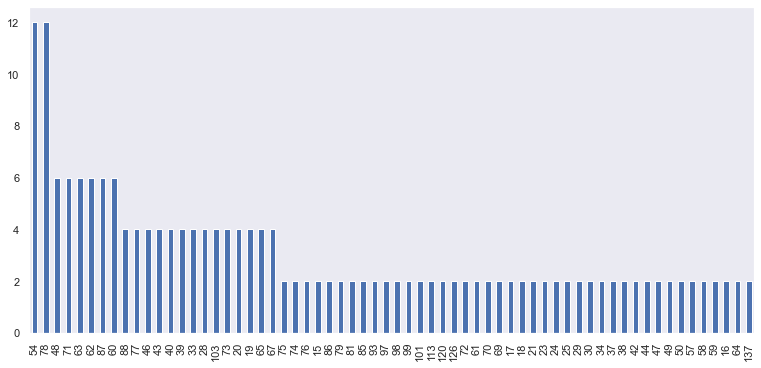

In [13]:
df['Annual Income (k$)'].value_counts().plot.bar(figsize = (13, 6))

<AxesSubplot:>

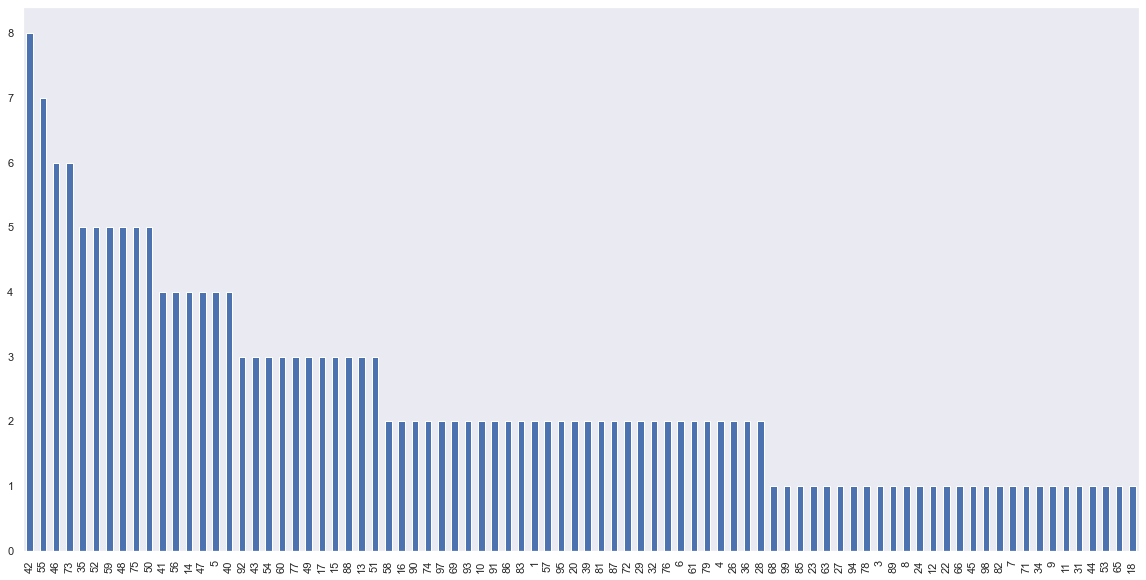

In [14]:
df['Spending Score (1-100)'].value_counts().plot.bar(figsize = (20, 10))

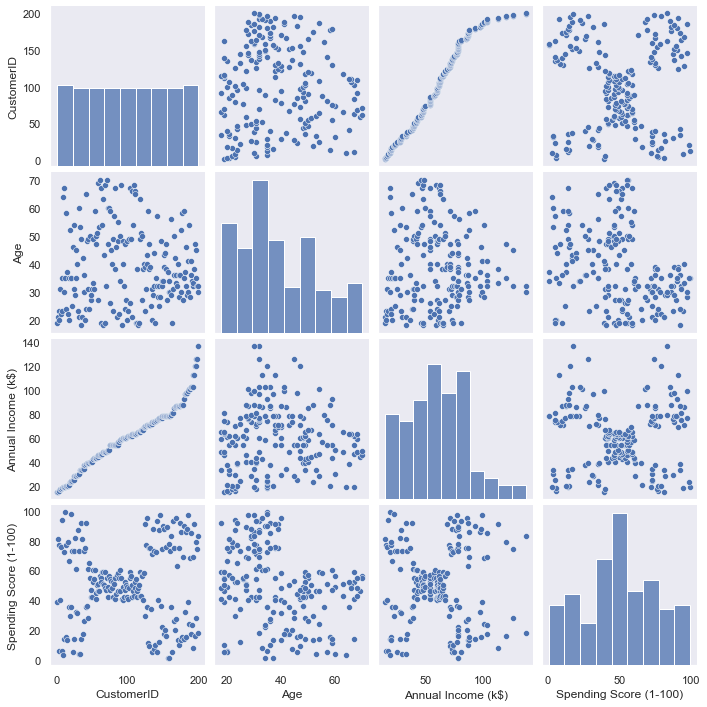

In [15]:
sns.pairplot(df)

In [16]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

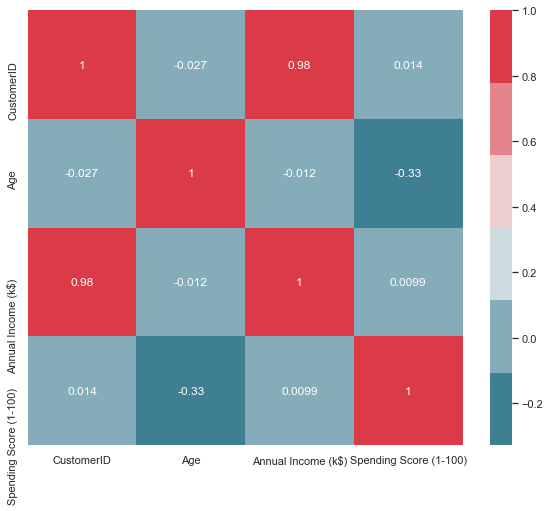

In [17]:
fig, axis = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,annot=True, cmap = sns.diverging_palette(220, 10, as_cmap = False),
            square = True, ax = axis)

Text(0, 0.5, 'Annual Income (k$)')

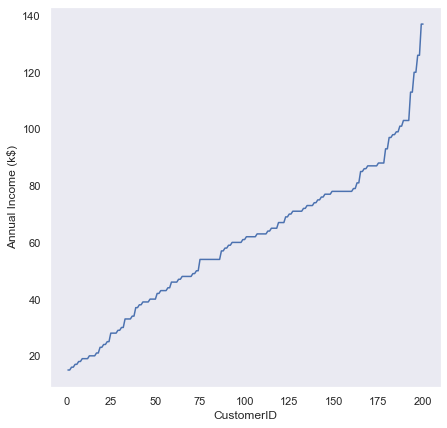

In [18]:
x = df['CustomerID']
y = df['Annual Income (k$)']

plt.plot(x, y)
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')

Text(0, 0.5, 'Age')

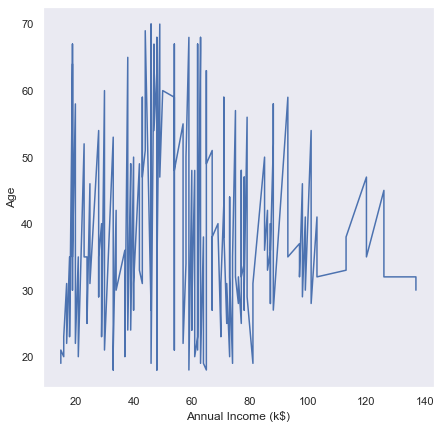

In [19]:
x = df['Annual Income (k$)']
y = df['Age']

plt.plot(x, y)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')

In [20]:
x = df.iloc[:, [3, 4]].values

print(x.shape)

(200, 2)


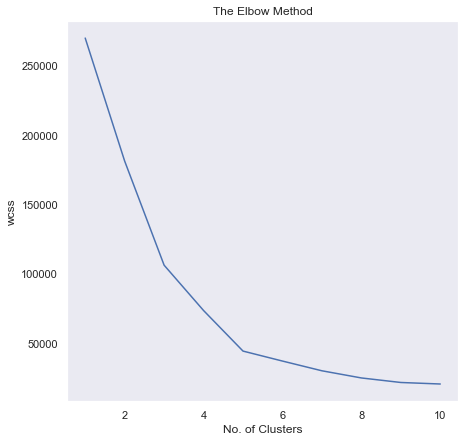

In [21]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

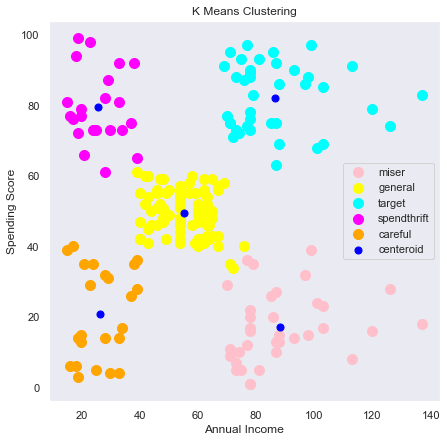

In [22]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


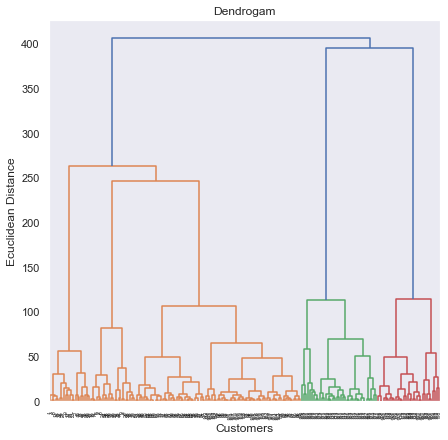

In [23]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

# Clusters of Customers Based on their Ages

In [24]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [25]:
x = df.iloc[:, [2, 4]].values
x.shape

(200, 2)

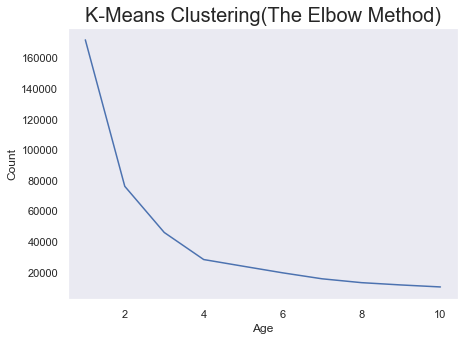

In [26]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

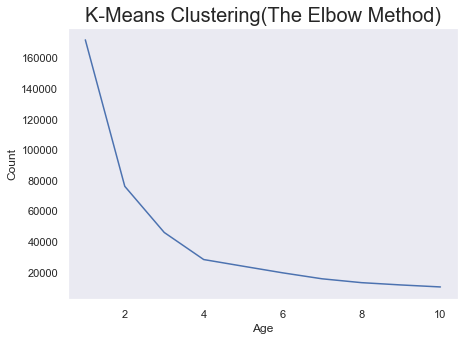

In [27]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [28]:
df['Genre'].replace(['Male', 'Female'], [0, 1], inplace = True)
df['Genre'].value_counts()

1    112
0     88
Name: Genre, dtype: int64

In [29]:
x = df.iloc[:, [2, 4]].values
x.shape

(200, 2)

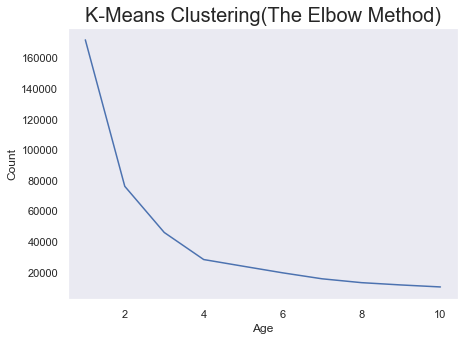

In [30]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

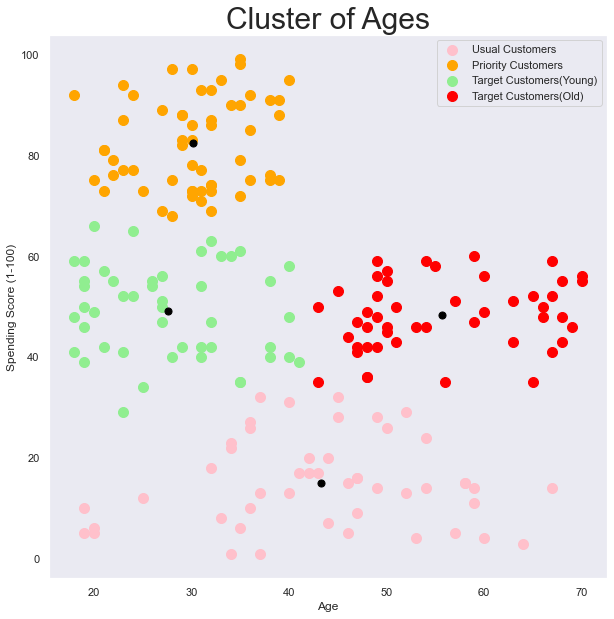

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

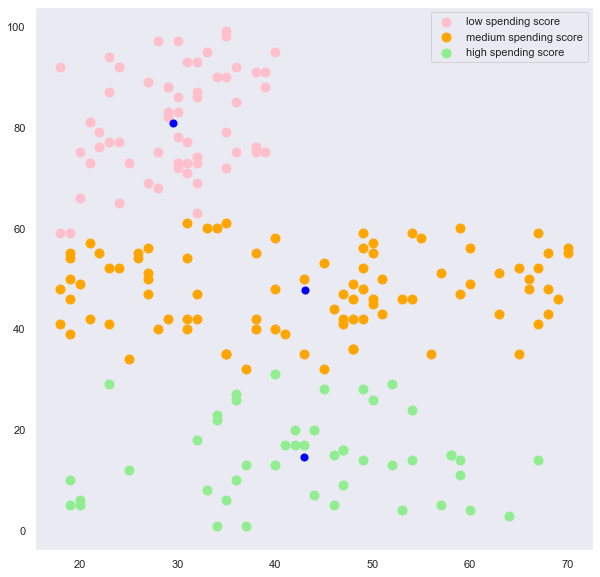

In [32]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 80, c = 'pink', label = 'low spending score')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 80, c = 'orange', label = 'medium spending score')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 80, c = 'lightgreen', label = 'high spending score')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'blue')
plt.legend()
plt.show()

# Clustering based on Genders

In [33]:
df['Genre'].replace(['Male', 'Female'], [0, 1], inplace = True)
df['Genre'].value_counts()

1    112
0     88
Name: Genre, dtype: int64

In [34]:
x = df.iloc[:, [1, 4]].values
x.shape

(200, 2)

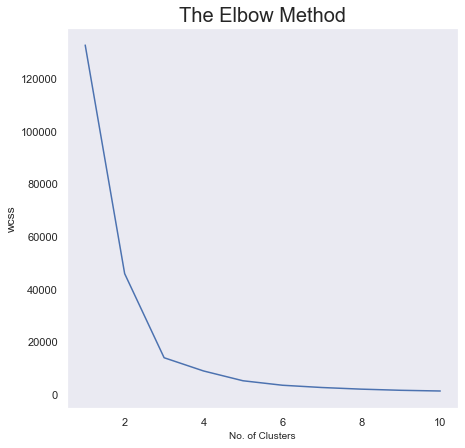

In [35]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  
plt.rcParams['figure.figsize'] = (7, 7)
plt.title('The Elbow Method', fontsize = 20)
plt.plot(range(1, 11), wcss)
plt.xlabel('No. of Clusters', fontsize = 10)
plt.ylabel('wcss')
plt.show()

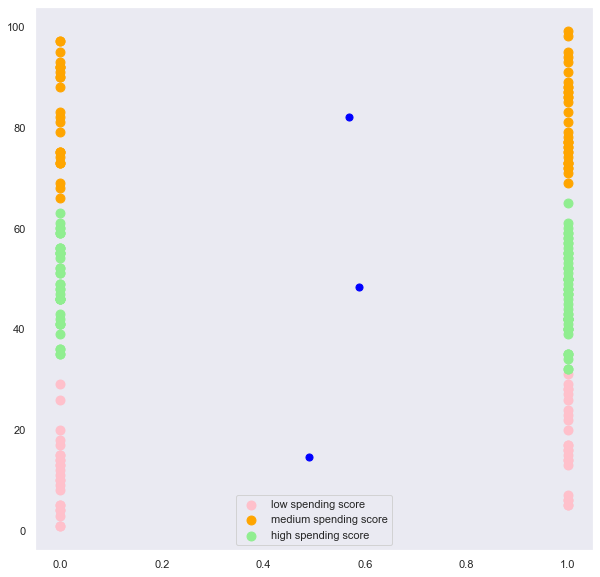

In [36]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 80, c = 'pink', label = 'low spending score')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 80, c = 'orange', label = 'medium spending score')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 80, c = 'lightgreen', label = 'high spending score')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'blue')
plt.legend()
plt.show()

From Above cluster plot we can clearly see that males and females are in all the catgory that is high low and medium spending score category